# simple MNIST neural net

handwritten digits

In [138]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [139]:
# look at some data
print(x_train.shape)

(60000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

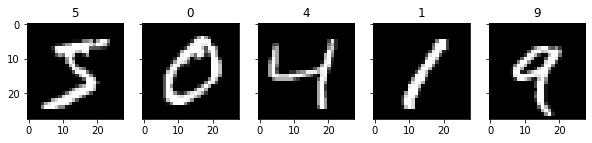

In [140]:
# display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
                        sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show

In [141]:
# change to oh
depth = 10
y_train_oh = tf.one_hot(y_train, depth)

depth = 10
y_test_oh = tf.one_hot(y_test, depth)

In [142]:
# check oh
print(y_train_oh.shape)

(60000, 10)


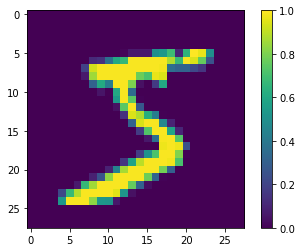

In [143]:
# scale color values
x_train = x_train / 255
x_test = x_test / 255
# check it out
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [144]:
# flatten
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
# check if flat
print(x_train_flat.shape)
print(x_train.shape)

(60000, 784)
(60000, 28, 28)


In [146]:
# other specifications
LEARNING_RATE = 1e-4
n_iteration = 1000
batch_size = 128
dropout = 0.5
# these aren't right

In [147]:
# layers: build model structure with keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_99 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_______________________________________________

In [148]:
# compile: loss function, optimizer, and metrics
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],)

In [200]:
# run it!
model.fit(x_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0149 - accuracy: 0.9957
Epoch 2/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.0159 - accuracy: 0.9956
Epoch 3/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.0136 - accuracy: 0.9962
Epoch 4/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.0150 - accuracy: 0.9958
Epoch 5/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.0137 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.0145 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.0101 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0137 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.0112 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 2s 922us/

In [150]:
# test accuracy
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0874 - accuracy: 0.9819

Test accuracy: 0.9818999767303467


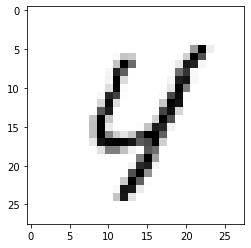

In [197]:
# pick an image to predict
image_index = 555
plt.imshow(x_test[image_index], cmap='Greys')

In [198]:
pred = model.predict(x_test_flat[image_index].reshape(1, 784))
pred = np.argmax(pred, axis=1)
print(pred)

[4]
